## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [1]:
import pandas as pd

df = pd.read_stata("gss7222_r4.dta",convert_categoricals=False)

In [3]:
df.describe()

,year,id,wrkstat,hrs1,hrs2,evwork,occ,prestige,wrkslf,wrkgovt,...,agehef13,agehef14,hompoph,hhtype1_exp,batch,subsamprate,wtssps_nea,wtssnrps_nea,wtssps_next,wtssnrps_next
count,72390.000000,72390.000000,72354.000000,41560.000000,1401.000000,25446.000000,24267.000000,24267.000000,68349.000000,28079.000000,...,2.0,1.0,3540.000000,1742.000000,2004.000000,6453.000000,843.000000,843.000000,1235.000000,1235.000000
mean,1997.715541,1241.796395,3.058891,41.183951,39.206281,1.143755,468.067911,39.356451,1.885221,1.812351,...,1.0,1.0,1.821469,5.089552,1.395709,0.579622,1.000000,1.000000,1.000000,1.000000
std,15.109995,912.273245,2.430446,14.125299,13.549101,0.350848,279.188558,14.037120,0.318757,0.390439,...,0.0,NaN,0.870081,4.123456,0.489124,0.247289,1.252159,1.251813,1.266347,1.180530
min,1972.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,12.000000,1.000000,1.000000,...,1.0,1.0,1.000000,1.000000,1.000000,0.200000,0.112206,0.049729,0.106381,0.090816
25%,1985.000000,534.000000,1.000000,37.000000,35.000000,1.000000,245.000000,30.000000,2.000000,2.000000,...,1.0,1.0,1.000000,2.000000,1.000000,0.500000,0.364248,0.307250,0.358660,0.339571
50%,1998.000000,1083.000000,2.000000,40.000000,40.000000,1.000000,394.000000,39.000000,2.000000,2.000000,...,1.0,1.0,2.000000,4.000000,1.000000,0.500000,0.628251,0.570879,0.598251,0.602136
75%,2010.000000,1722.000000,5.000000,48.000000,45.000000,1.000000,694.000000,48.000000,2.000000,2.000000,...,1.0,1.0,2.000000,6.000000,2.000000,0.500000,1.188035,1.169048,1.089063,1.207341
max,2022.000000,4510.000000,8.000000,89.000000,89.000000,2.000000,984.000000,82.000000,2.000000,2.000000,...,1.0,1.0,9.000000,18.000000,2.000000,1.000000,17.815383,16.167341,14.499165,13.168541


In [6]:
columns = ["paeduc", "maeduc", "sei", "satjob", "age", "sex", "race"]
df = df[columns]

### Introduction/background
The General Social Survey (GSS) is a comprehensive and nationally representative survey that has been conducted since the 1970s, capturing a wide range of social, demographic, and behavioral data from American respondents. For this exploratory data analysis (EDA), I have chosen a set of variables that focus on the relationship between childhood family characteristics and adult socioeconomic outcomes. Specifically, I aim to explore how factors such as parental education and family structure during childhood influence an individual’s socioeconomic status (SES) and job satisfaction in adulthood. This theme is particularly relevant because it touches on issues of social mobility, intergenerational transmission of advantage, and the long-term impact of early life conditions.

### Variables Chosen

PAEDUC: Father’s highest level of education.

    Why chosen: Parental education is a key indicator of childhood socioeconomic status and is often linked to the resources and opportunities available to children.

MAEDUC: Mother’s highest level of education.

    Why chosen: Similar to paternal education, maternal education provides insight into the family’s educational environment and its potential influence on a child’s future.

SEI (Socioeconomic Index): A composite measure of occupational prestige and income, used as a proxy for adult socioeconomic status.

    Why chosen: SEI is a robust indicator of an individual’s economic and social standing in adulthood, making it a useful outcome variable.

SATJOB: Job satisfaction, measured on a scale from "Very Satisfied" to "Very Dissatisfied."

    Why chosen: Job satisfaction is an important measure of well-being and career success, which may be influenced by early life advantages or disadvantages.

AGE: Respondent’s age at the time of the survey.

    Why chosen: Age is a critical control variable, as socioeconomic outcomes and job satisfaction may vary across different stages of life.

SEX: Respondent’s sex (male or female).

    Why chosen: Gender is a significant factor in understanding disparities in socioeconomic outcomes and job satisfaction.

RACE: Respondent’s race.

    Why chosen: Race is another important demographic factor that can influence access to opportunities and socioeconomic outcomes.

### Why This Data is Interesting
    The relationship between childhood family characteristics and adult outcomes is a central topic in sociology, economics, and public policy. Understanding how early life factors shape later life success can provide insights into:

    Social Mobility: How do parental resources (e.g., education) influence a child’s ability to move up or down the socioeconomic ladder?


### broader questions:

    Do individuals with higher-educated parents tend to have higher socioeconomic status as adults?

    Is there a gender or racial disparity in the relationship between parental education and adult outcomes?

    How does job satisfaction vary across different demographic groups, and is it influenced by childhood family characteristics?

### Potential Limitations
limitations:

    Cross-Sectional Data: The GSS is cross-sectional, meaning it captures data at a single point in time. This limits our ability to make causal inferences about the relationship between childhood characteristics and adult outcomes.

    Missing Data: Some variables may have missing values, which could introduce bias if not handled properly.

    Self-Reported Data: Variables like job satisfaction and parental education are self-reported, which may introduce measurement error or bias.


In [ ]:
# Check for missing values
print(df.isnull().sum())


paeduc    20861
maeduc    11787
sei       41113
satjob    20503
age         769
sex         112
race        107
dtype: int64


In [ ]:
df = df.dropna()
#dropped na

In [18]:
print(df["satjob"])

21878    Moderately Satisfied
21880          Very Satisfied
21881          Very Satisfied
21882          Very Satisfied
21883    Moderately Satisfied
                 ...         
55075    Moderately Satisfied
55077          Very Satisfied
55084    Moderately Satisfied
55085          Very Satisfied
55086    Moderately Satisfied
Name: satjob, Length: 15427, dtype: object


In [10]:
df["satjob"] = df["satjob"].replace({1: "Very Satisfied", 2: "Moderately Satisfied", 3: "A Little Dissatisfied", 4: "Very Dissatisfied"})
print(df.head())

       paeduc  maeduc   sei                satjob   age  sex  race
21878    16.0    16.0  60.6  Moderately Satisfied  29.0  2.0   1.0
21880    20.0    20.0  38.4        Very Satisfied  48.0  2.0   1.0
21881     8.0     8.0  38.0        Very Satisfied  27.0  2.0   1.0
21882    12.0     4.0  45.8        Very Satisfied  27.0  2.0   2.0
21883    14.0    12.0  42.7  Moderately Satisfied  24.0  1.0   1.0


In [11]:
print(df.describe())

             paeduc        maeduc           sei           age           sex  \
count  15427.000000  15427.000000  15427.000000  15427.000000  15427.000000   
mean      11.590718     11.649770     50.855610     41.472224      1.537823   
std        4.094626      3.417877     19.313656     12.925428      0.498584   
min        0.000000      0.000000     17.100000     18.000000      1.000000   
25%        9.000000     10.000000     33.600000     31.000000      1.000000   
50%       12.000000     12.000000     48.500000     40.000000      2.000000   
75%       14.000000     13.000000     64.200000     50.000000      2.000000   
max       20.000000     20.000000     97.200000     89.000000      2.000000   

               race  
count  15427.000000  
mean       1.224801  
std        0.553409  
min        1.000000  
25%        1.000000  
50%        1.000000  
75%        1.000000  
max        3.000000  


1. PAEDUC (Father’s Education)
    Count: 15,427 respondents provided data on their father’s education.

    Mean: 11.59 years of education, which is slightly above a high school diploma.

    Std Dev: 4.09, indicating moderate variability in fathers’ education levels.

    Min: 0 years (likely indicating missing data or no formal education).

    Max: 20 years (equivalent to a postgraduate degree).

    Distribution:

    25th percentile: 9 years (some high school).

    Median: 12 years (high school diploma).

    75th percentile: 14 years (some college or associate degree).

    Insight: Most fathers have at least a high school education, but there is significant variability, with some having no formal education and others holding advanced degrees.

2. MAEDUC (Mother’s Education)
    Count: 15,427 respondents provided data on their mother’s education.

    Mean: 11.65 years of education, similar to fathers’ education levels.

    Std Dev: 3.42, indicating slightly less variability compared to fathers’ education.

    Min: 0 years (likely indicating missing data or no formal education).

    Max: 20 years (equivalent to a postgraduate degree).

    Distribution:

    25th percentile: 10 years (some high school).

    Median: 12 years (high school diploma).

    75th percentile: 13 years (some college or associate degree).

    Insight: Mothers’ education levels are similar to fathers’, but the slightly lower standard deviation suggests that mothers’ education is more clustered around the mean.

3. SEI (Socioeconomic Index)
    Count: 15,427 respondents provided data on their socioeconomic index.

    Mean: 50.86, indicating a moderate level of occupational prestige and income.

    Std Dev: 19.31, indicating significant variability in socioeconomic status.

    Min: 17.1 (lowest SEI score, indicating low-prestige occupations).

    Max: 97.2 (highest SEI score, indicating high-prestige occupations).

    Distribution:

    25th percentile: 33.6 (lower-middle socioeconomic status).

    Median: 48.5 (middle socioeconomic status).

    75th percentile: 64.2 (upper-middle socioeconomic status).

    Insight: The SEI scores are widely distributed, suggesting a diverse range of occupational prestige and income levels among respondents.

4. AGE
    Count: 15,427 respondents provided their age.

    Mean: 41.47 years, indicating a middle-aged sample.

    Std Dev: 12.93, indicating a wide age range.

    Min: 18 years (youngest respondents).

    Max: 89 years (oldest respondents).

    Distribution:

    25th percentile: 31 years.

    Median: 40 years.

    75th percentile: 50 years.

    Insight: The sample spans a broad age range, with most respondents being between 31 and 50 years old.

5. SEX
    Count: 15,427 respondents provided their sex.

    Mean: 1.54, where 1 = male and 2 = female. This suggests that approximately 54% of the sample is female and 46% is male.

    Std Dev: 0.50, indicating a relatively balanced distribution.

    Min: 1 (male).

    Max: 2 (female).

    Insight: The sample is slightly skewed toward female respondents, but the distribution is relatively balanced.

6. RACE
    Count: 15,427 respondents provided their race.

    Mean: 1.22, where:

    1 = White.

    2 = Black.

    3 = Other.

    Std Dev: 0.55, indicating that most respondents identify as White.

    Min: 1 (White).

    Max: 3 (Other).

    Distribution:

    25th percentile: 1 (White).

    Median: 1 (White).

    75th percentile: 1 (White).

    Insight: The majority of respondents identify as White, with smaller proportions identifying as Black or Other.

Key Observations and Insights
    Parental Education:

        Both fathers and mothers have similar average education levels (~11.6 years), but fathers show slightly more variability.

        Most parents have at least a high school education, but there is a significant range, from no formal education to postgraduate degrees.

Socioeconomic Index (SEI):

    The average SEI score is 50.86, indicating moderate occupational prestige and income.

    The wide standard deviation (19.31) suggests significant socioeconomic diversity in the sample.

Demographics:

    The sample is middle-aged on average (mean age = 41.47), with a broad age range (18–89 years).

    The sample is slightly skewed toward female respondents (54% female, 46% male).

    The majority of respondents identify as White (mean = 1.22), with smaller proportions identifying as Black or Other.


In [13]:
print(pd.crosstab(df["satjob"], df["sex"]))

sex                     1.0   2.0
satjob                           
A Little Dissatisfied   639   770
Moderately Satisfied   2877  3111
Very Dissatisfied       238   289
Very Satisfied         3376  4127


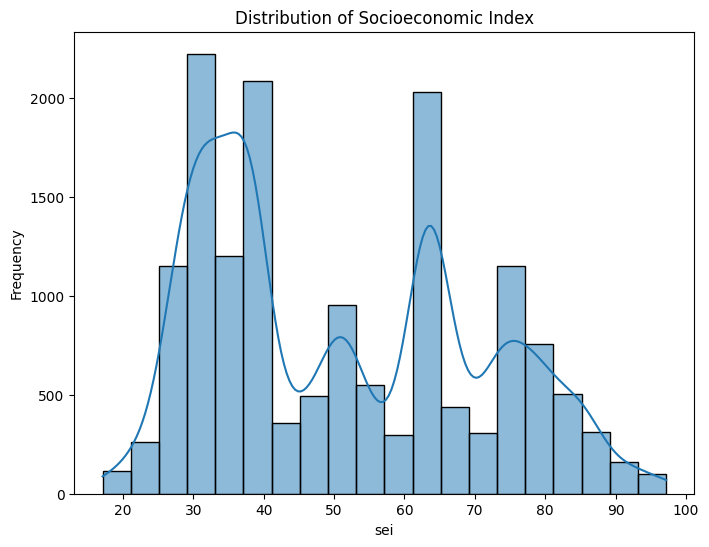

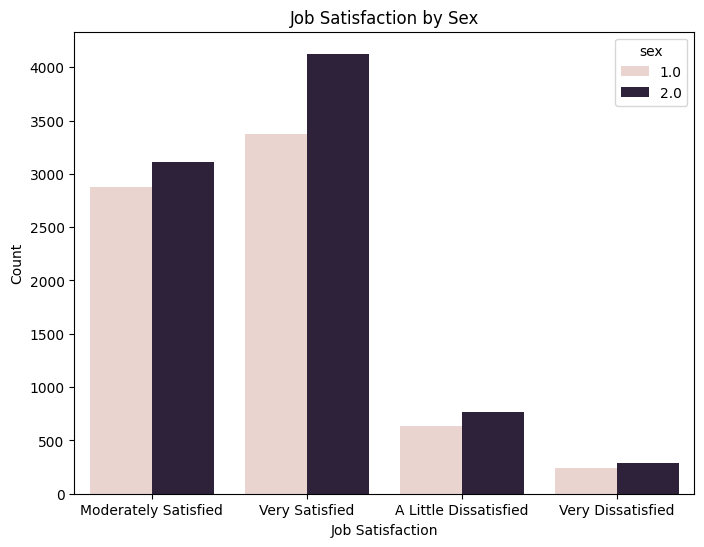

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(df["sei"], bins=20, kde=True)
plt.title("Distribution of Socioeconomic Index")
plt.xlabel("sei")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x="satjob", hue="sex", data=df)
plt.title("Job Satisfaction by Sex")
plt.xlabel("Job Satisfaction")
plt.ylabel("Count")
plt.show()

1. Distribution of Socioeconomic Index (SEI)
    Visualization Description:
    The histogram shows the distribution of SEI scores across respondents.

    The x-axis represents SEI scores, ranging from 20 to 100.

    The y-axis represents the frequency of respondents in each SEI bin.

    Key Observations:
    Peak Frequency:

    The highest frequency of respondents falls within the SEI range of 40–60, which aligns with the median SEI score of 48.5 (from the summary statistics).

    This suggests that most respondents have moderate occupational prestige and income levels.

    Spread of SEI Scores:

    The distribution is slightly right-skewed, with a tail extending toward higher SEI scores (70–100).

    This indicates that while most respondents have moderate SEI scores, there is a smaller group with significantly higher occupational prestige and income.

    Low SEI Scores:

    There is a noticeable but smaller group of respondents with SEI scores below 40, indicating lower socioeconomic status.

    Insights:
    The majority of respondents fall into the middle range of socioeconomic status, with fewer individuals at the extremes (very low or very high SEI scores).

    The right skew suggests that achieving high occupational prestige and income is less common.

2. Job Satisfaction by Sex
    Visualization Description:
    The bar plot shows the distribution of job satisfaction levels (SATJOB) by sex.

    The x-axis represents job satisfaction categories: "Moderately Satisfied," "Very Satisfied," "A Little Dissatisfied," and "Very Dissatisfied."

    The y-axis represents the count of respondents in each category.

    Sex is coded as 1.0 (male) and 2.0 (female).

    The majority of respondents report being either "Very Satisfied" or "Moderately Satisfied" with their jobs.

    Very few respondents report being "Very Dissatisfied."

    Sex Differences:

        Females (2.0) report higher levels of job satisfaction across all categories compared to males (1.0).

        For example, 4,127 females report being "Very Satisfied" compared to 3,376 males.

        Similarly, 3,111 females report being "Moderately Satisfied" compared to 2,877 males.

        The gap is smaller for dissatisfaction categories, but females still report slightly higher dissatisfaction.

    Insights:
        Females tend to report higher job satisfaction than males, which could be due to differences in job types, work environments, or personal expectations.

        The overall high levels of job satisfaction suggest that most respondents are content with their work, regardless of sex.

3. Combined Insights
Socioeconomic Status and Job Satisfaction:

    The moderate SEI scores for most respondents align with the high levels of job satisfaction, suggesting that individuals with moderate occupational prestige and income are generally content with their jobs.

    However, further analysis could explore whether higher SEI scores correlate with higher job satisfaction.

Gender and Job Satisfaction:

    The higher job satisfaction among females could be influenced by factors such as job type, work-life balance, or societal expectations.

    It would be interesting to explore whether these differences persist when controlling for other variables like SEI, age, or race.